## Importing Relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn

# data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# metrics
from sklearn.metrics import (confusion_matrix, precision_score,
                             recall_score, accuracy_score, 
                             f1_score, mean_squared_error, roc_curve, auc, balanced_accuracy_score)
from sklearn.metrics import PrecisionRecallDisplay, ConfusionMatrixDisplay, RocCurveDisplay, classification_report

# model selection
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# classification models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# oversampling
from imblearn.over_sampling import RandomOverSampler, ADASYN, SMOTE

# neural network
from sklearn.neural_network import MLPClassifier
# visualization
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.patches import Rectangle
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

## Data Analysis

In [2]:
dataframe = pd.read_csv("healthcare-dataset-stroke-data.csv")
dataframe

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
# data shape
rows, cols = dataframe.shape
print(f"The dataset is composed of {rows} rows and {cols} columns.")

The dataset is composed of 5110 rows and 12 columns.


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


We observe multiple NaN values for the <*bmi*> category (exactly 201 values) which make up approximately **4%** of the data for this feature. We can look into replacing the NaN values with the mean for this category.
We also drop the **id** comlumn from our dataset as it has no influence on our expected outcome.

In [5]:
dataframe = dataframe.drop(labels= "id", axis=1)
dataframe.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Some Statistics For the Numerical Data

In [6]:
dataframe.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Representing Unique Values of Categorical Features

In [7]:
# get categorical data having multiple labels
categorical = ["gender", "hypertension", "heart_disease", "ever_married", "work_type", "Residence_type", "smoking_status"]
categorical_df = pd.DataFrame()
for categorical_feature in categorical:
    tmp_df = pd.DataFrame({categorical_feature:dataframe[categorical_feature].unique()})
    categorical_df = pd.concat([categorical_df, tmp_df], axis=1)
categorical_df.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status
0,Male,0.0,1.0,Yes,Private,Urban,formerly smoked
1,Female,1.0,0.0,No,Self-employed,Rural,never smoked
2,Other,NaN,NaN,NaN,Govt_job,NaN,smokes
3,NaN,NaN,NaN,NaN,children,NaN,Unknown
4,NaN,NaN,NaN,NaN,Never_worked,NaN,NaN


### Visualizing Distribution of Categorical Features

In [8]:
X = dataframe.drop(labels=["stroke"], axis=1)
Y = dataframe["stroke"]

X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked


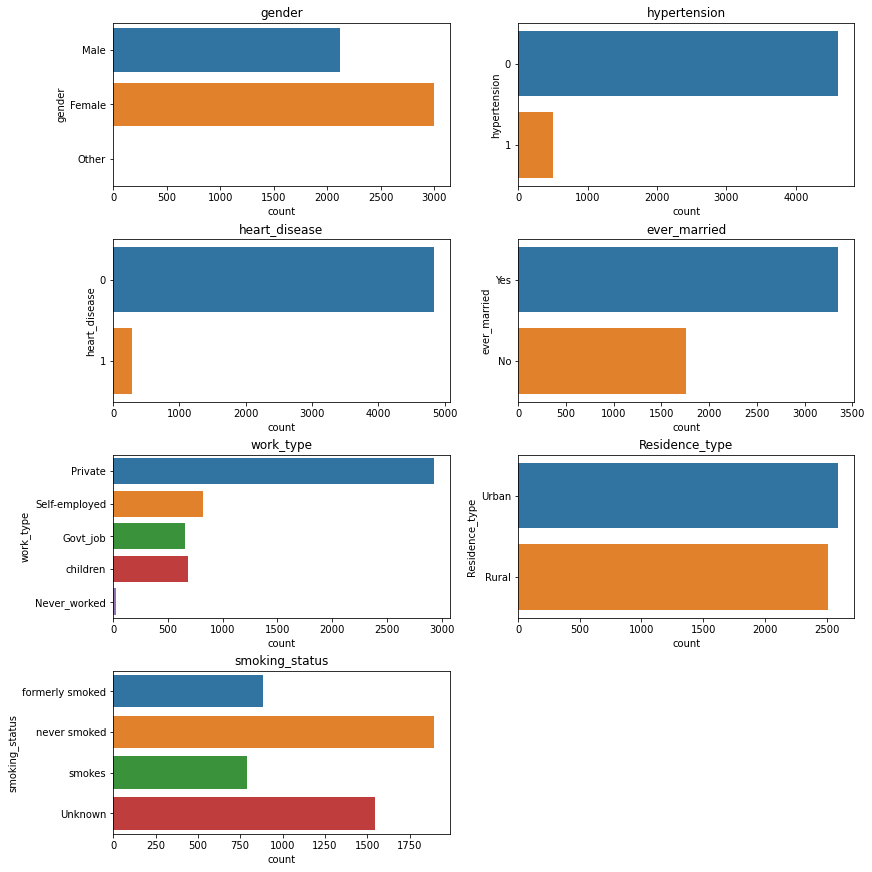

In [9]:
all_categories = categorical

fig, ax = plt.subplots(4, 2, figsize=(12,5), constrained_layout=True)
fig.delaxes(ax[3,1])
fig.set_figheight(12)
for i, cat_var in enumerate(all_categories):
    try:
        j,k = np.unravel_index(i, shape= (4, 2))
        cp = sns.countplot(y=cat_var, data=X, label='features', ax=ax[j,k])
        ax[j,k].set_title(cat_var)
    except Exception as e:
        print(e)
plt.show()

### Visualizing Distribution of Target

#### Helper Function - Target Distribution Visualizer

In [10]:
def vis_target_dist(target_var, title):
    
    pie_data = target_var.value_counts(normalize=True).values * 100
    pie_label = target_var.value_counts(normalize=True).index

    fig, ax = plt.subplots(figsize=(8,6))

    wedges, texts, autotexts = ax.pie(pie_data, startangle=0, explode=[0, 0.2],
                                      autopct='%.2f%%', textprops={'color':'w', 'fontsize':14, 'weight':'bold'})

    ax.legend(wedges, pie_label,
              title='Stroke',
              loc='center left', bbox_to_anchor=(1, 0.5))
    
    plt.title(title)
    plt.tight_layout()

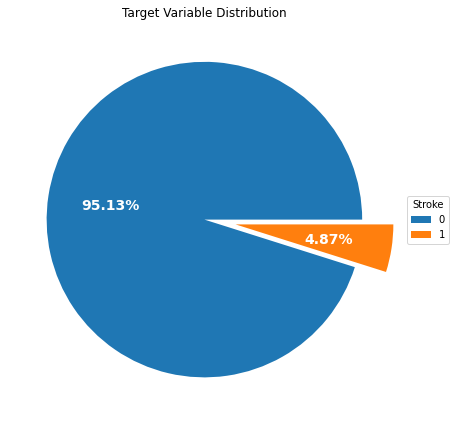

In [11]:
vis_target_dist(Y, "Target Variable Distribution")
plt.show()

### Finding Correlation of the Categorical Features
In this part, we want to represent the correlation between each of the features in the dataset against the target value *stroke*. Pearson's correleation ([source](https://statistics.laerd.com/statistical-guides/pearson-correlation-coefficient-statistical-guide.php)) can be easily obtained using the `pandas` library. This approach allows us to recognize the most relevant features in our dataset by identifying the ones with the lowest correlation value calculated by Pearson's correlation.

In [12]:
# get a one-hot-encoded representation of the categorical data (required for the Pearson Correlation calculation)
dataframe_ohe = pd.get_dummies(data=dataframe)
dataframe_ohe

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,NaN,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,NaN,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
5106,81.0,0,0,125.20,40.0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
5107,35.0,0,0,82.99,30.6,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.6,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0


In [13]:
# setting a figure size for the heatmap
plt.figure(figsize=(16,12))
# calculating correlation and storing it in a dataframe
cor = dataframe_ohe.corr()
cor.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
age,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257,0.027924,-0.027623,-0.010659,-0.679125,...,-0.078653,0.116534,0.327989,-0.634215,-0.014180,0.014180,-0.378231,0.236897,0.119307,0.073133
hypertension,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904,-0.021143,0.021275,-0.004597,-0.164243,...,-0.021608,-0.005413,0.115442,-0.129506,0.007913,-0.007913,-0.141501,0.058853,0.065063,0.031240
heart_disease,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914,-0.085617,0.085717,-0.003343,-0.114644,...,-0.015712,0.000027,0.086760,-0.091634,-0.003092,0.003092,-0.066731,0.066804,-0.021856,0.044049
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945,-0.054902,0.054580,0.011489,-0.155068,...,-0.014675,0.016588,0.062694,-0.102250,0.004946,-0.004946,-0.095131,0.068111,0.023885,0.017646
bmi,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374,0.026360,-0.026020,-0.011802,-0.341695,...,-0.028602,0.208029,0.072701,-0.448674,0.000122,-0.000122,-0.270340,0.107031,0.107964,0.088324


<Figure size 1152x864 with 0 Axes>

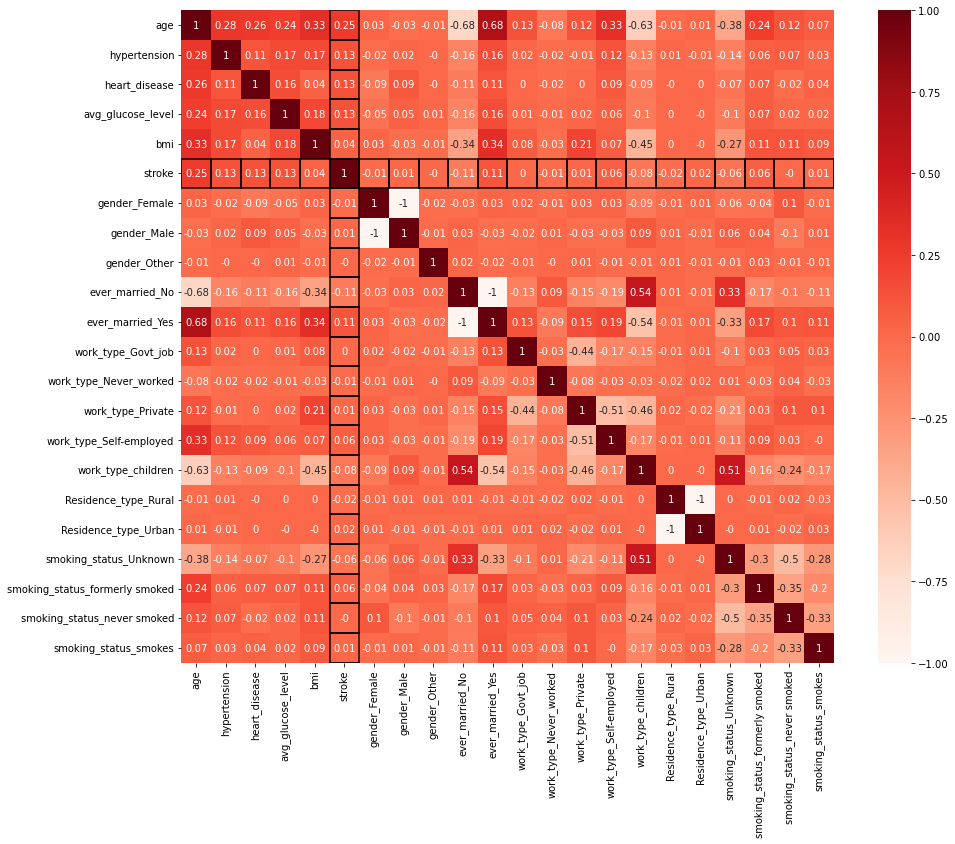

In [14]:
plt.figure(figsize=(16,12))
ax = sns.heatmap(cor.round(2), square=True, cmap=plt.cm.Reds, annot=True)
for i in dataframe_ohe.index[dataframe_ohe['stroke'] == True].tolist():
    j = dataframe_ohe.columns.get_loc('stroke')
    ax.add_patch(Rectangle((i, j), 1, 1, ec='black', fc='none', lw=2, alpha=0.7))
    ax.add_patch(Rectangle((j, i), 1, 1, ec='black', fc='none', lw=2, alpha=0.7))
plt.show()

In [15]:
#Correlation with output variable
cor_target = abs(cor["stroke"])
#Selecting highly correlated features
cor_target

age                               0.245257
hypertension                      0.127904
heart_disease                     0.134914
avg_glucose_level                 0.131945
bmi                               0.042374
stroke                            1.000000
gender_Female                     0.009027
gender_Male                       0.009117
gender_Other                      0.003166
ever_married_No                   0.108340
ever_married_Yes                  0.108340
work_type_Govt_job                0.002677
work_type_Never_worked            0.014882
work_type_Private                 0.011888
work_type_Self-employed           0.062168
work_type_children                0.083869
Residence_type_Rural              0.015458
Residence_type_Urban              0.015458
smoking_status_Unknown            0.055892
smoking_status_formerly smoked    0.064556
smoking_status_never smoked       0.004129
smoking_status_smokes             0.008939
Name: stroke, dtype: float64

From the correlation values calculated, for each output in a categorical feature, if one output isn't highly correlated to the target **stroke**, we can deduce that the entire feature is relevant and not correlated.
All of the features in our dataset are relevant. We note the 3 most relevant based on correlation values:
- **gender**
- **work_type**
- **smoking_status/Residence_type**

### Inspecting Missing or NaN Values

In [16]:
def summarize_missingness(df):
    '''
    Utility function to summarize missing or NaN values
    '''
    nulls = df.isnull()
    counts = nulls.sum()
    percs = nulls.mean().mul(100.)
    
    nulls_df = pd.DataFrame({'Count of missing/NaN values': counts, 'Percentage of missing values': percs}, 
                            index=counts.index)
    
    display(nulls_df)

In [17]:
vars_with_na = [col for col in dataframe_ohe if dataframe_ohe[col].isnull().sum() > 0]
summarize_missingness(dataframe[vars_with_na])

,Count of missing/NaN values,Percentage of missing values
bmi,201,3.933464


We can see that only the feature **bmi** has 201 missing or NaN values which represent ~4% of the datapoints.

### Some More EDA
In this part, we inspect the features of the dataset in function of the target class **stroke**. We seek to further understand the underlying relation between the dataset features and the output obtained.

#### Numerical Variables Vs Stroke
The numerical variables in our dataset are **age**, **bmi** and **avg_glucose_level**. In this part, we will try to comprehend the effect of each of these variables on our target.

In [18]:
num_vars = dataframe.select_dtypes(include=['float']).columns.tolist()
num_vars

['age', 'avg_glucose_level', 'bmi']

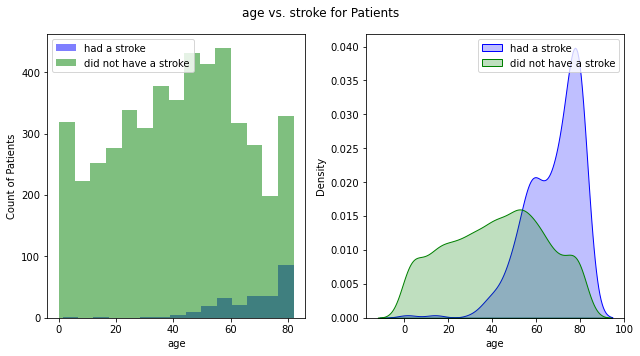

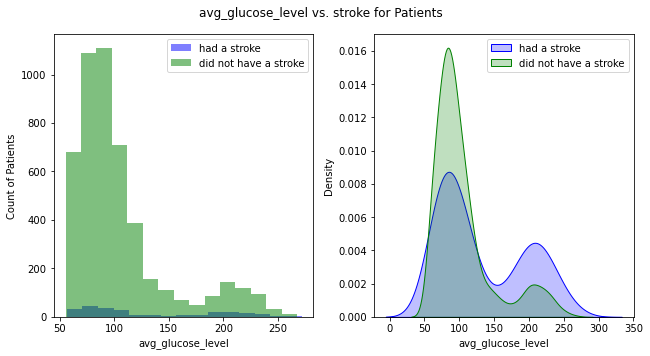

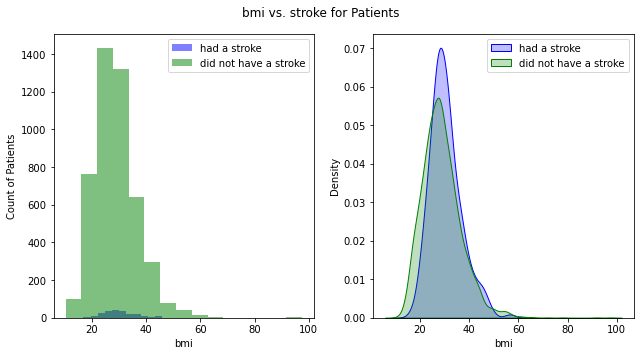

In [19]:
target_var = "stroke"
color1, color2 = "blue", "green"
for num_var in num_vars:
    fig, ax = plt.subplots(nrows= 1, ncols= 2 )
    fig.set_figheight(5)
    fig.set_figwidth(9)

    ax[0].hist(dataframe[dataframe[target_var]==1][f"{num_var}"], bins=15, alpha=0.5, color=color1, label="had a stroke")
    ax[0].hist(dataframe[dataframe[target_var]==0][f"{num_var}"], bins=15, alpha=0.5, color=color2, label="did not have a stroke")

    ax[0].set_xlabel(num_var)
    ax[0].set_ylabel("Count of Patients")
    ax[0].legend();


    sns.kdeplot(dataframe[dataframe[target_var]==1][num_var], shade=True, color=color1, label="had a stroke", ax=ax[1])
    sns.kdeplot(dataframe[dataframe[target_var]==0][num_var], shade=True, color=color2, label="did not have a stroke", ax=ax[1])

    ax[1].set_xlabel(num_var)
    ax[1].set_ylabel("Density")
    ax[1].legend();
    fig.suptitle(f"{num_var} vs. {target_var} for Patients");
    plt.tight_layout()
    plt.show()

#### Categorical Variables Vs Stroke

In [20]:
cat_vars = categorical
cat_vars

['gender',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status']

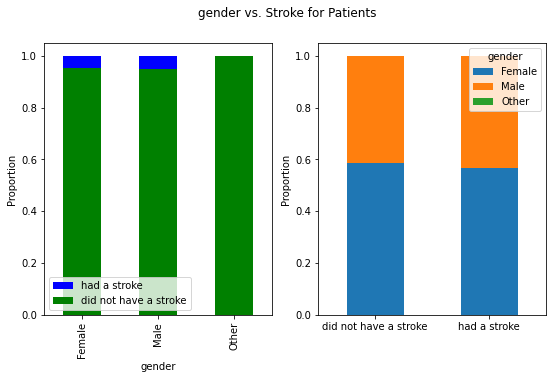

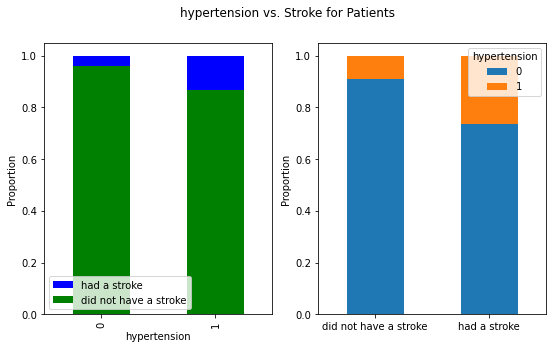

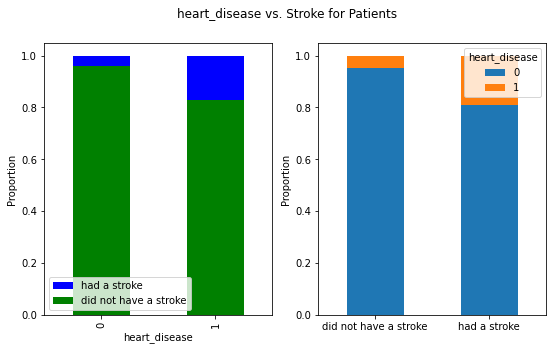

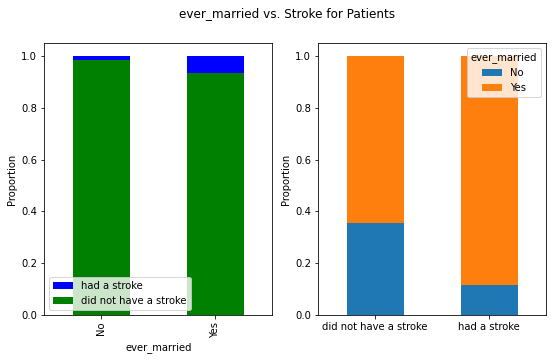

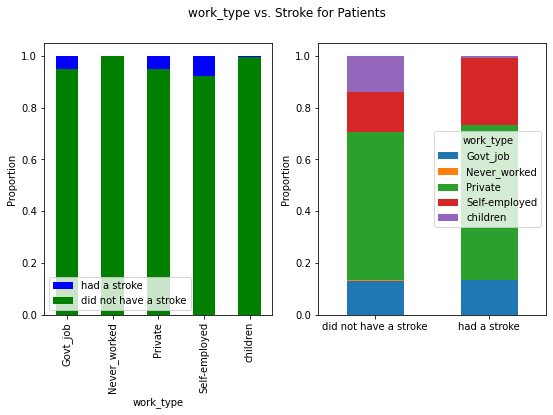

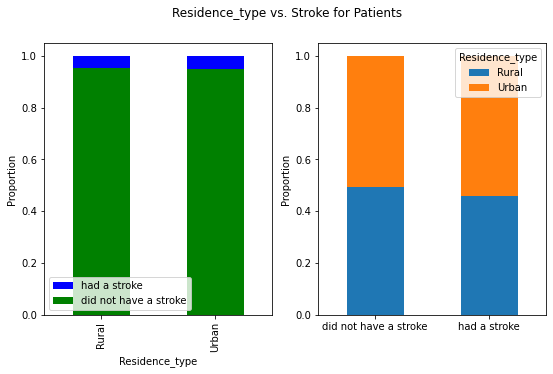

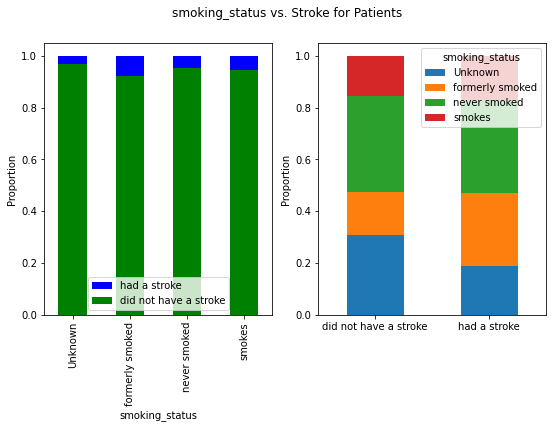

In [21]:
target_var = "stroke"
for cat_var in cat_vars:
    tmp_counts_df = dataframe.groupby([cat_var, target_var])["age"].count().unstack()
    
    tmp_target_perc_df = tmp_counts_df.T.div(tmp_counts_df.T.sum()).T
    tmp_feature_perc_df = tmp_counts_df.div(tmp_counts_df.sum()).T

    fig, ax = plt.subplots(nrows=1, ncols= 2)
    fig.set_figheight(5)
    fig.set_figwidth(9)
    
    tmp_target_perc_df.plot(kind="bar", stacked=True, color=["green", "blue"], ax=ax[0])
    ax[0].set_xlabel(cat_var)
    ax[0].set_ylabel("Proportion")
    color_patches = [
        Patch(facecolor="blue", label="had a stroke"),
        Patch(facecolor="green", label="did not have a stroke")
    ]
    ax[0].legend(handles=color_patches)
    
    tmp_feature_perc_df.plot(kind="bar", stacked=True, ax=ax[1])
    ax[1].legend(title=cat_var)
    ax[1].set_xticklabels(["did not have a stroke", "had a stroke"], rotation=0)
    ax[1].set_xlabel("")
    ax[1].set_ylabel("Proportion")
    
    fig.suptitle(f"{cat_var} vs. Stroke for Patients");

#### Numerical Variables

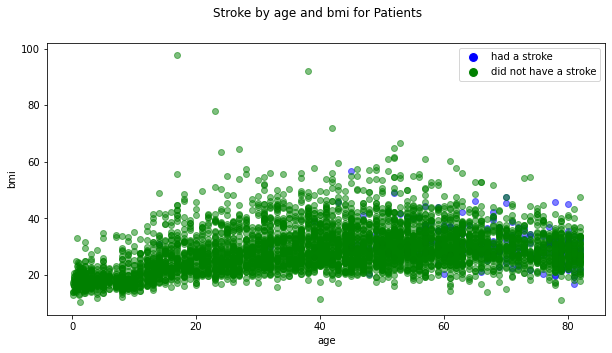

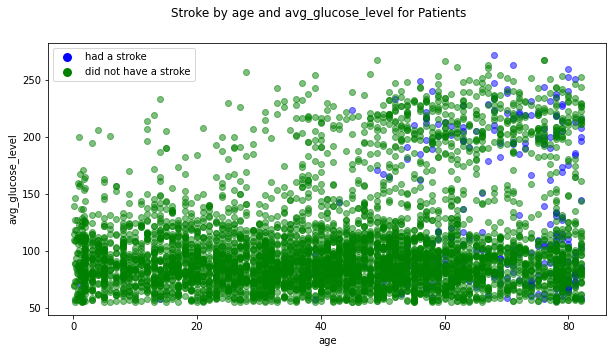

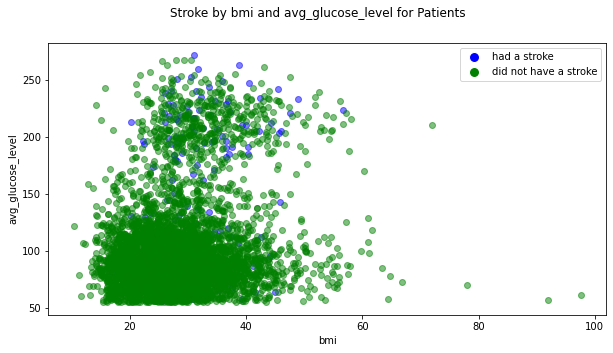

In [22]:
combs = [("age","bmi"), ("age", "avg_glucose_level"), ("bmi", "avg_glucose_level")]
target_var = "stroke"

for comb in combs:
    num_var1, num_var2 = comb
    fig, ax = plt.subplots(figsize=(10, 5))

    ax.scatter(dataframe[dataframe[target_var]==1][num_var1], dataframe[dataframe[target_var]==1][num_var2], c="blue", alpha=0.5)
    ax.scatter(dataframe[dataframe[target_var]==0][num_var1], dataframe[dataframe[target_var]==0][num_var2], c="green", alpha=0.5)

    ax.set_xlabel(num_var1)
    ax.set_ylabel(num_var2)

    color_patches = [
        Line2D([0], [0], marker='o', color='w', label='had a stroke', markerfacecolor='b', markersize=10),
        Line2D([0], [0], marker='o', color='w', label='did not have a stroke', markerfacecolor='g', markersize=10)
    ]
    ax.legend(handles=color_patches)

    fig.suptitle(f"Stroke by {num_var1} and {num_var2} for Patients");

## Feature Engineering
After visualizing all of the features in our dataset, we notice some NaN values which we need to remove, we also need to normalize the numerical features as well as establish one-hot-encoded representations of the features. We might also be interested in removing the *Others* value for the gender as it represents 0.02% of the **gender** feature. 

### Gender Feature
For this feature, we remove the *Others* value

In [23]:
# get the index of the row having "Other" as value for gender
Other_idx = dataframe.index[dataframe['gender']=="Other"].tolist()
dataframe_cleaned = dataframe.drop(Other_idx)
dataframe_cleaned

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [24]:
# representing the categorical values after dropping
# get categorical data having multiple labels
categorical = categorical

categorical_df = pd.DataFrame()
for categorical_feature in categorical:
    tmp_df = pd.DataFrame({categorical_feature:dataframe_cleaned[categorical_feature].unique()})
    categorical_df = pd.concat([categorical_df, tmp_df], axis=1)
categorical_df.fillna("", inplace= True)
categorical_df.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status
0,Male,0.0,1.0,Yes,Private,Urban,formerly smoked
1,Female,1.0,0.0,No,Self-employed,Rural,never smoked
2,,,,,Govt_job,,smokes
3,,,,,children,,Unknown
4,,,,,Never_worked,,


### BMI Feature
We will fill the NaN values with the mean values for the BMI features as there are 240+ datapoints with NaN values we might risk loosing important information.

In [25]:
dataframe_cleaned['bmi'].fillna((dataframe_cleaned['bmi'].mean()), inplace= True)

vars_with_na = [col for col in dataframe_cleaned if dataframe_cleaned[col].isnull().sum() > 0]
summarize_missingness(dataframe_cleaned[vars_with_na])

,Count of missing/NaN values,Percentage of missing values


### Feature Scaling
Feature scaling is the process of scaling numerical features either by min-max scaling or standardizations so that we keep our values in a defined range for each feature.
- For standardization: $${x_{stand}}=\frac{{x_{orig}-\mu}}{\sigma}$$ where $\mu$ is the mean and $\sigma$ is the standard deviation.
- min-max scalar: $${x_{norm}}=\frac{{x_{orig}-min}}{max-min}$$
We will apply the min-max technique since our dataset distribution is not normal. As a result we will have values between 0 and 1.

In [26]:
cat_vars = categorical + ["stroke"]
# intialize output dataframe
dataframe_scaled = pd.DataFrame()

# separate categorical and numerical features into two different dataframes
dataframe_cleaned_cat = dataframe_cleaned[[c for c in dataframe_cleaned.columns if c in cat_vars]]
dataframe_cleaned_num = dataframe_cleaned[[c for c in dataframe_cleaned.columns if c in num_vars]]

# scale numerical values using Standard scalar
scaler = MinMaxScaler()
dataframe_scaled_num = pd.DataFrame(scaler.fit_transform(dataframe_cleaned_num), columns= num_vars)

# reset index of categorical data points (index resets after scaling - difference in scaling comes from removing "Others")
# data points from the dataset
dataframe_cleaned_cat = pd.DataFrame(np.array(dataframe_cleaned_cat), columns = cat_vars)

# concatenating both dataframes
dataframe_scaled = pd.concat([dataframe_scaled_num, dataframe_cleaned_cat], axis= 1)

# converting binary categories to int64 since after passing to array it's transformed to Object
binary_cat = ["hypertension", "heart_disease", "stroke"]
dataframe_scaled[binary_cat] = dataframe_scaled[binary_cat].astype(np.int64)

dataframe_scaled

,age,avg_glucose_level,bmi,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
0,0.816895,0.801265,0.301260,Male,0,1,Yes,Private,Urban,formerly smoked,1
1,0.743652,0.679023,0.212996,Female,0,0,Yes,Self-employed,Rural,never smoked,1
2,0.975586,0.234512,0.254296,Male,0,1,Yes,Private,Rural,never smoked,1
3,0.597168,0.536008,0.276060,Female,0,0,Yes,Private,Urban,smokes,1
4,0.963379,0.549349,0.156930,Female,1,0,Yes,Self-employed,Rural,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,0.975586,0.132167,0.212996,Female,1,0,Yes,Private,Urban,never smoked,0
5105,0.987793,0.323516,0.340206,Female,0,0,Yes,Self-employed,Urban,never smoked,0
5106,0.426270,0.128658,0.232532,Female,0,0,Yes,Self-employed,Rural,never smoked,0
5107,0.621582,0.513203,0.175258,Male,0,0,Yes,Private,Rural,formerly smoked,0


### One-Hot-Encoding Non-Binary Categorical Features

In [27]:
dataframe_ohe_scaled = pd.get_dummies(data= dataframe_scaled)
dataframe_ohe_scaled

,age,avg_glucose_level,bmi,hypertension,heart_disease,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.816895,0.801265,0.301260,0,1,1,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0
1,0.743652,0.679023,0.212996,0,0,1,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
2,0.975586,0.234512,0.254296,0,1,1,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
3,0.597168,0.536008,0.276060,0,0,1,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
4,0.963379,0.549349,0.156930,1,0,1,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,0.975586,0.132167,0.212996,1,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
5105,0.987793,0.323516,0.340206,0,0,0,1,0,0,1,...,0,0,1,0,0,1,0,0,1,0
5106,0.426270,0.128658,0.232532,0,0,0,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
5107,0.621582,0.513203,0.175258,0,0,0,0,1,0,1,...,0,1,0,0,1,0,0,1,0,0


### Getting Feature Matrix and Target Vector

In [28]:
X = dataframe_ohe_scaled.drop("stroke", axis= 1) #Feature Matrix
y = dataframe_ohe_scaled["stroke"] #Target Variable

### Using Correlation to Filter-Out Features
From the calculated correlation matrix, we are able to filter-out low-correlation features with the target since they do not provide any information with regards to the target.

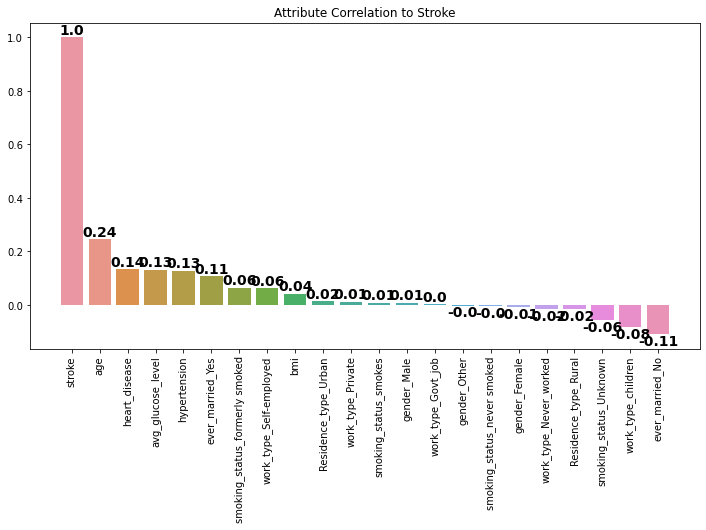

In [29]:
corr_matrix = cor.round(3)
corr_target = corr_matrix['stroke'].sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(12,6))

sns.barplot(x=corr_target.index, y=corr_target.values, ax=ax)

ax.grid(False)
ax.set_title('Attribute Correlation to Stroke')
plt.setp(ax.get_xticklabels(), rotation=90)

for n, x in enumerate(corr_target.index):
    if corr_target[n] >= 0:
        ax.text(x=n, y=corr_target[n], s=corr_target[n].round(2),
            horizontalalignment='center', verticalalignment='bottom',
            fontsize=14, fontweight='bold')
    else:
        ax.text(x=n, y=corr_target[n], s=corr_target[n].round(2),
            horizontalalignment='center', verticalalignment='top',
            fontsize=14, fontweight='semibold')

ax.axis('tight')

plt.show()

We can select the following features having the highest correlation with respect to the target:
- age
- heart_disease
- avg_glucose_level

We can also select some others having some lower correlations but provide information about the targets:
- hypertension
- ever_married (Yes/No)

In [30]:
X_filtered = X[["age", "hypertension", "heart_disease", "avg_glucose_level", "ever_married_No", "ever_married_Yes"]]
y = dataframe_ohe_scaled["stroke"]
X_filtered

,age,hypertension,heart_disease,avg_glucose_level,ever_married_No,ever_married_Yes
0,0.816895,0,1,0.801265,0,1
1,0.743652,0,0,0.679023,0,1
2,0.975586,0,1,0.234512,0,1
3,0.597168,0,0,0.536008,0,1
4,0.963379,1,0,0.549349,0,1
...,...,...,...,...,...,...
5104,0.975586,1,0,0.132167,0,1
5105,0.987793,0,0,0.323516,0,1
5106,0.426270,0,0,0.128658,0,1
5107,0.621582,0,0,0.513203,0,1


It is important to note that we can also keep the remaining features but after some performed experiments, fitlering features increased the model performance as we removed noisy data which did not contribute to the target prediction.

## Model Training
To train any machine learning model, we must follow the steps below: 
1. obtain a processed dataset with relevant features - split into train/val/test
2. define project/model metrics based on which we benchmark models - either accuracy, precision, recall, f1-score or ROC curve
3. select an appropriate model to best fit our data
4. train a model and evaluate performance based on validation data and metrics
5. test model on testing data
6. if we need some improvements thorugh hyperparameter tuning we repeat from step 3

### Splitting The Dataset

In [31]:
# set seed
SEED = 100

# separate data into train and test
# test_size= 0.15 => 15% testing 85% training
# Fix the seed to the random generator
X_train, X_test, y_train, y_test = train_test_split(np.array(X_filtered), np.array(y), test_size=0.15, random_state=SEED)

print(f"Shape of training features {X_train.shape}")
print(f"Shape of test features {X_test.shape}")
print(f"Shape of training targets {y_train.shape}")
print(f"Shape of testing targets {y_test.shape}")

Shape of training features (4342, 6)
Shape of test features (767, 6)
Shape of training targets (4342,)
Shape of testing targets (767,)


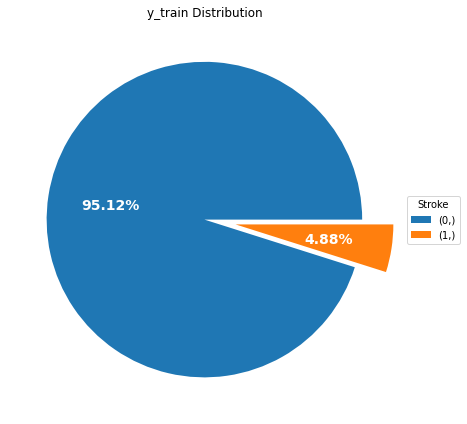

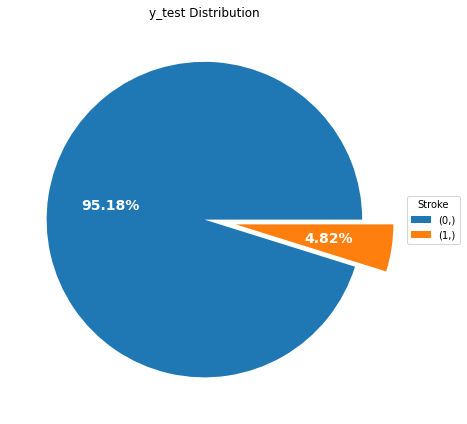

In [32]:
vis_target_dist(pd.DataFrame(y_train), "y_train Distribution")
vis_target_dist(pd.DataFrame(y_test), "y_test Distribution")

plt.show()

### Metrics To Consider

Confusion Matrix, Precision, Recall, f1-score, Precision-recall curve.

In [33]:
def construct_classification_report(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    diag_cm = cm.diagonal()
    class_pos_acc = diag_cm[0]
    class_neg_acc = diag_cm[1]

    balanced_acc = (class_neg_acc + class_pos_acc)/2
    
    cr = classification_report(y_true, y_pred)
    aug_cr = cr[:53] + "\taccuracy" + cr[53:108] + f"\t    {class_pos_acc:.2f}" + cr[108:162]\
        + f"\t    {class_neg_acc:.2f}" + cr[162:217] + f"\tbalanced accuracy: {balanced_acc:.2f}" + cr[217:]
    
    return aug_cr

In [34]:
def vis_metrics(y_true, y_pred, model_name= None):
    
    print(construct_classification_report(y_true, y_pred))
    
    disp = ConfusionMatrixDisplay.from_predictions(y_true, y_pred, labels= [1, 0])
    disp.ax_.set_title("Confusion Matrix")

    
    # plot PR curve
    disp = PrecisionRecallDisplay.from_predictions(y_true, y_pred, pos_label= 1, name= model_name)
    disp.ax_.set_title("P-R Curve")
    
    disp = RocCurveDisplay.from_predictions(y_true, y_pred, pos_label= 1, name= model_name)
    disp.ax_.set_title("ROC Curve")

### Model Training
In this part, we will implement 3 models for classification:
- Random Forest
- Logistic Regression
- Multi-Layered Perceptron (Neural Network)

#### Logistic Regression Model

              precision    recall  f1-score   support	accuracy

           0       0.95      1.00      0.97      4130	    1.00
           1       0.00      0.00      0.00       212	    0.00

    accuracy                           0.95      4342	balanced accuracy: 0.50
   macro avg       0.48      0.50      0.49      4342
weighted avg       0.90      0.95      0.93      4342



C:\Users\Charb\anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Charb\anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Charb\anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


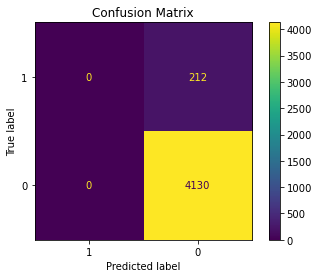

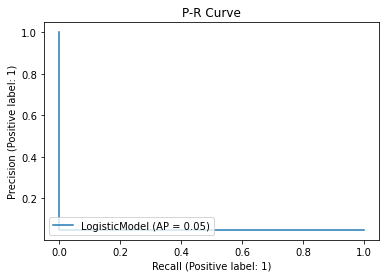

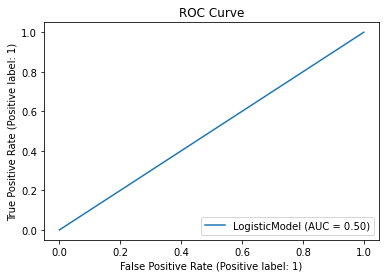

In [35]:
logistic_model = LogisticRegression(max_iter= 1000)
logistic_model.fit(X_train, y_train)

# Predicting on the test data
pred_normal = logistic_model.predict(X_train)

vis_metrics(y_train, pred_normal, "LogisticModel")
plt.show()

We note that the performance of this model is rather low with no regard to our positive class which is a patient having a stroke. This target is our main objective and low performance on that target should not be accepted for this model.
This low performance comes from the fact that our target distribution from the training set is not balanced. Thus the learning process favors the overall accuracy but not one class accuracy. We will use the following methods to try and counter this issue:
- **Assigning Class Weights**: it's the process of assigning weights to each of the target classes favoring one class over the other during training; the class with the higher weight will impose a larger penalty on the model.
- **Over-sampling**: Oversampling is the process of randomly resampling the training dataset (and not the test set) in a way to favor the minority class and increase its representation in the training set. We will implement two methods: Random and ADASYN by using the *imbalanced-learn* library. 

These methods will be implemented for all 3 training models.

#### Logistic Regression Model with Weighted Classes

##### Obtaining Class Weights

Available scoring metrics to obtain the best class weights.

In [36]:
def get_class_weights(X_train, y_train, scoring= 'f1'):
    lr = LogisticRegression(solver='newton-cg')

    #Setting the range for class weights
    weights = np.linspace(0.0,0.99,200)

    #Creating a dictionary grid for grid search
    param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

    #Fitting grid search to the train data with 5 folds
    gridsearch = GridSearchCV(estimator= lr, 
                              param_grid= param_grid,
                              cv=StratifiedKFold(), 
                              n_jobs=-1, 
                              scoring= scoring, 
                              verbose=2).fit(X=X_train, y=y_train)

    #Ploting the score for different values of weight
    sns.set_style('whitegrid')
    fig, ax = plt.subplots()

    weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})

    x, y = weigh_data['weight'], weigh_data['score']

    def annot_max(x,y, ax=None):
        xmax = x[np.argmax(y)]
        ymax = y.max()
        text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
        if not ax:
            ax=plt.gca()
        bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
        arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
        kw = dict(xycoords='data',textcoords="axes fraction",
                  arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
        ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)

        return xmax, ymax

    sns.lineplot(x, y)
    xmax, ymax = annot_max(x,y)
    plt.xlabel('Weight for class 1')
    plt.ylabel(scoring)
    plt.xticks([round(i/10,1) for i in range(0,11,1)])
    plt.title('Scoring for different class weights')
    plt.show()
    
    return xmax, ymax

In [37]:
scoring = 'f1'
#sklearn.metrics.SCORERS.keys() Scoring techniques can be shown from this output

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


C:\Users\Charb\anaconda3\envs\ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


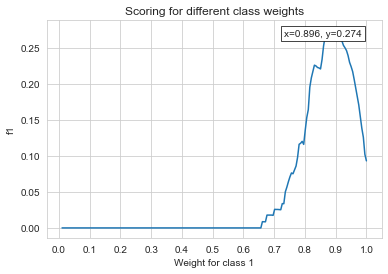

In [38]:
xmax, ymax = get_class_weights(X_train, y_train, scoring= scoring)

##### Logistic Regression Model Trainning + Metrics Visualization

              precision    recall  f1-score   support	accuracy

           0       0.98      0.85      0.91       730	    0.85
           1       0.18      0.65      0.28        37	    0.65

    accuracy                           0.84       767	balanced accuracy: 0.75
   macro avg       0.58      0.75      0.60       767
weighted avg       0.94      0.84      0.88       767



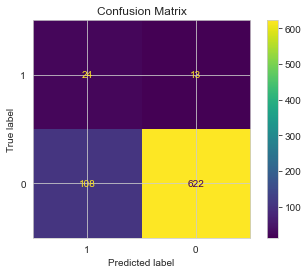

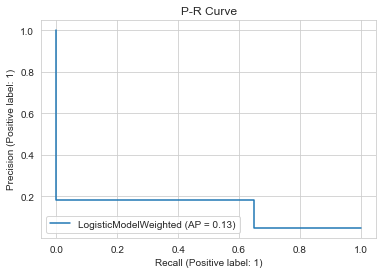

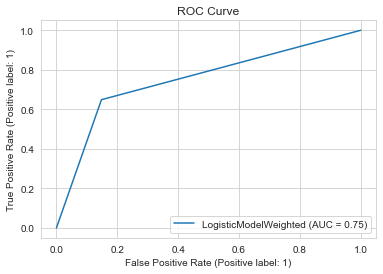

In [39]:
logistic_model = LogisticRegression(solver='newton-cg', class_weight={0: (0.99-xmax), 1:xmax}, max_iter= 1000)
logistic_model.fit(X_train, y_train)

# Predicting on the test data
pred_weighted = logistic_model.predict(X_test)

vis_metrics(y_test, pred_weighted, "LogisticModelWeighted")
plt.show()

#### Over-Sampling Dataset - Random

In [40]:
ros = RandomOverSampler(random_state=0)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

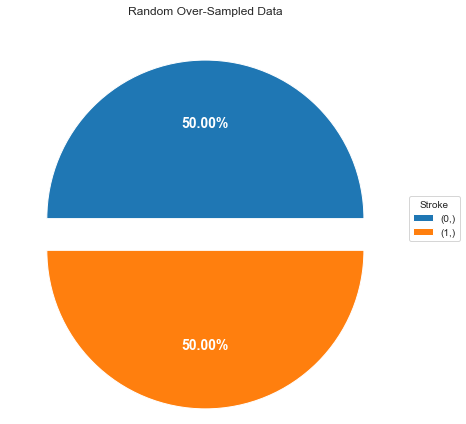

In [41]:
vis_target_dist(pd.DataFrame(y_train_ros), "Random Over-Sampled Data")

              precision    recall  f1-score   support	accuracy

           0       0.99      0.73      0.84       730	    0.73
           1       0.13      0.84      0.23        37	    0.84

    accuracy                           0.73       767	balanced accuracy: 0.78
   macro avg       0.56      0.78      0.53       767
weighted avg       0.95      0.73      0.81       767



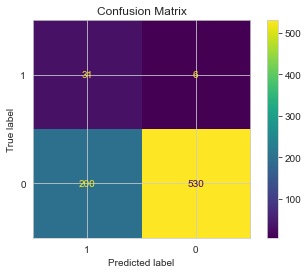

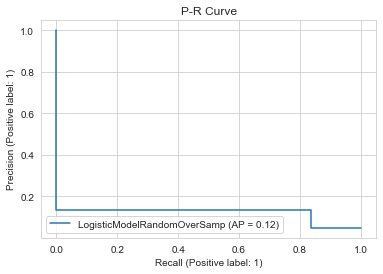

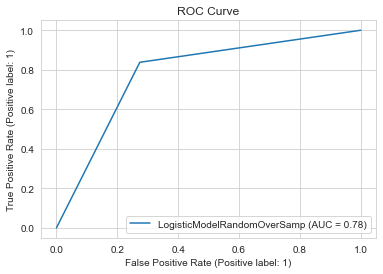

In [42]:
logistic_model = LogisticRegression(solver='newton-cg', max_iter= 1000)
logistic_model.fit(X_train_ros, y_train_ros)

# Predicting on the test data
pred_rand_overs = logistic_model.predict(X_test)

vis_metrics(y_test, pred_rand_overs, "LogisticModelRandomOverSamp")
plt.show()

#### Over-Sampling Dataset - ADASYN

In [43]:
X_train_adasyn, y_train_adasyn = ADASYN().fit_resample(X_train, y_train)

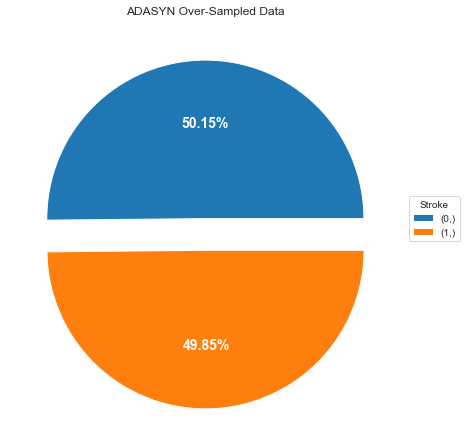

In [44]:
vis_target_dist(pd.DataFrame(y_train_adasyn), "ADASYN Over-Sampled Data")

              precision    recall  f1-score   support	accuracy

           0       0.99      0.72      0.83       730	    0.72
           1       0.13      0.84      0.23        37	    0.84

    accuracy                           0.73       767	balanced accuracy: 0.78
   macro avg       0.56      0.78      0.53       767
weighted avg       0.95      0.73      0.80       767



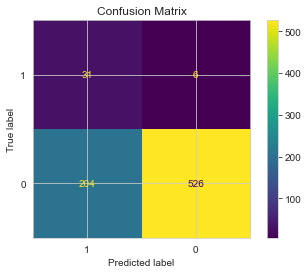

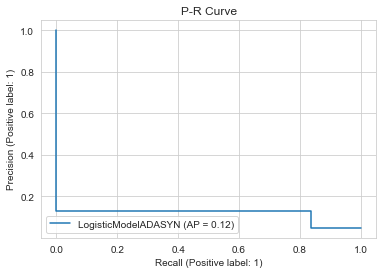

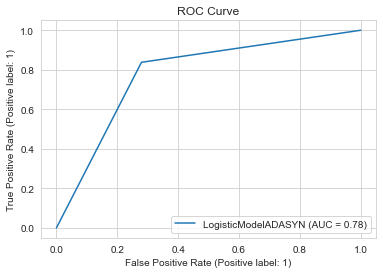

In [45]:
logistic_model = LogisticRegression(solver='newton-cg', max_iter= 1000)
logistic_model.fit(X_train_adasyn, y_train_adasyn)

# Predicting on the test data
pred_adasyn = logistic_model.predict(X_test)

vis_metrics(y_test, pred_adasyn, "LogisticModelADASYN")
plt.show()

We observe a good improvement over all the defined metrics when doing oversampling of the training dataset.
Oversampling is shown to have a better performance compared to class weights with a considerable increase on the recall to 81% and an increase to the unbalanced accuracy to 76% from 70%.
In this next part, we will use the over-sampled data on a neural network and on a random forset model since over-sampling proved to be the better technique in our case to combat the dataset distribution.

#### Neural Network

In [51]:
nn = MLPClassifier(hidden_layer_sizes= (10, 5, 1))
nn.fit(X_train_adasyn, y_train_adasyn)

C:\Users\Charb\anaconda3\envs\ml\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10, 5, 1))

              precision    recall  f1-score   support	accuracy

           0       0.99      0.67      0.80       730	    0.67
           1       0.12      0.86      0.21        37	    0.86

    accuracy                           0.68       767	balanced accuracy: 0.77
   macro avg       0.55      0.77      0.50       767
weighted avg       0.95      0.68      0.77       767



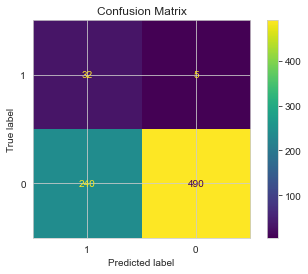

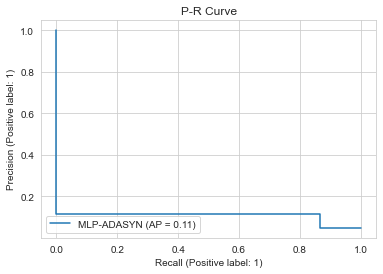

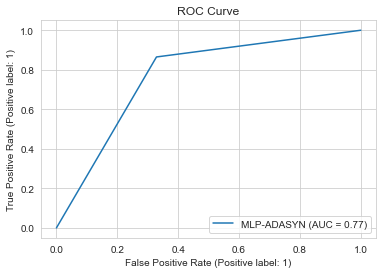

In [52]:
pred_nn = nn.predict(X_test)
vis_metrics(y_test , pred_nn, "MLP-ADASYN")

#### Random Forest

              precision    recall  f1-score   support	accuracy

           0       0.96      0.90      0.93       730	    0.90
           1       0.14      0.32      0.19        37	    0.32

    accuracy                           0.87       767	balanced accuracy: 0.61
   macro avg       0.55      0.61      0.56       767
weighted avg       0.92      0.87      0.89       767



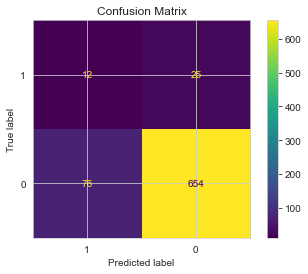

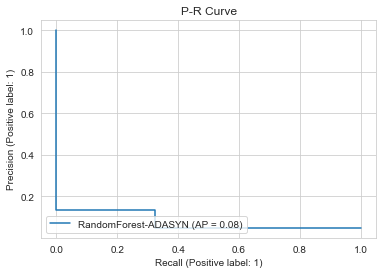

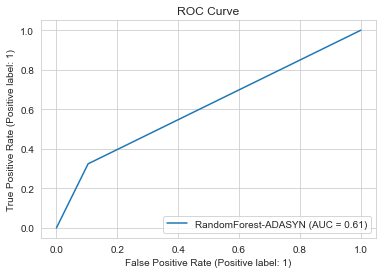

In [48]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_adasyn, y_train_adasyn)

pred_rf = rf_model.predict(X_test)
vis_metrics(y_test, pred_rf, "RandomForest-ADASYN")
plt.show()

### Model Evaluation

In this section, we evaluate all the three models implemented based on the defined metrics. 

In [53]:
print("Classification report for LOGISTIC REGRESSION - ADASYN")
print(classification_report(y_test, pred_adasyn))

print("Classification report for NEURAL NETWORK - ADASYN")
print(classification_report(y_test, pred_nn))

print("Classification report for RANDOM FOREST - ADASYN")
print(classification_report(y_test, pred_rf))

Classification report for LOGISTIC REGRESSION - ADASYN
              precision    recall  f1-score   support

           0       0.99      0.72      0.83       730
           1       0.13      0.84      0.23        37

    accuracy                           0.73       767
   macro avg       0.56      0.78      0.53       767
weighted avg       0.95      0.73      0.80       767

Classification report for NEURAL NETWORK - ADASYN
              precision    recall  f1-score   support

           0       0.99      0.67      0.80       730
           1       0.12      0.86      0.21        37

    accuracy                           0.68       767
   macro avg       0.55      0.77      0.50       767
weighted avg       0.95      0.68      0.77       767

Classification report for RANDOM FOREST - ADASYN
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       730
           1       0.14      0.32      0.19        37

    accuracy                

In [54]:
fpr_lr, tpr_lr, _ = roc_curve(y_true= y_test, y_score= pred_adasyn)
fpr_nn, tpr_nn, _ = roc_curve(y_true= y_test, y_score= pred_nn)
fpr_rf, tpr_rf, _ = roc_curve(y_true= y_test, y_score= pred_rf)

print(f"False Positive Rate/True Positive Rate for LOGISTIC REGRESSION - ADASYN: {fpr_lr[1]:.2f} - {tpr_lr[1]:.2f}")
print(f"False Positive Rate/True Positive Rate for NEURAL NETWORK - ADASYN: {fpr_nn[1]:.2f} - {tpr_nn[1]:.2f}")
print(f"False Positive Rate/True Positive Rate for RANDOM FOREST - ADASYN: {fpr_rf[1]:.2f} - {tpr_rf[1]:.2f}")

False Positive Rate/True Positive Rate for LOGISTIC REGRESSION - ADASYN: 0.28 - 0.84
False Positive Rate/True Positive Rate for NEURAL NETWORK - ADASYN: 0.33 - 0.86
False Positive Rate/True Positive Rate for RANDOM FOREST - ADASYN: 0.10 - 0.32


From the following data and the plots shown previously, we could possibly deploy the neural network model having the highest true positives rate. 
There are some other techniques we could implement to have a better assessment for our model however, due to the time limitations for this study we will suffise with the performed study.